<a href="https://colab.research.google.com/github/PayalGarud/Machine-Learning-Projects/blob/main/Copy_of_Hand_Written_Digit_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import Library
import pandas as pd


In [ ]:
import numpy as np


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
#import Data
from sklearn.datasets import load_digits

In [ ]:
df=load_digits()

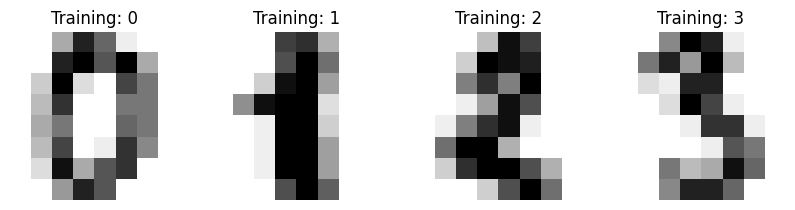

In [ ]:
_, axes = plt.subplots(nrows=1,ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [ ]:
#Data Preprocessing
df.images.shape

(1797, 8, 8)

In [ ]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
df.images[0].shape

(8, 8)

In [ ]:
len(df.images)

1797

In [ ]:
n_samples = len(df.images)
data = df.images.reshape(n_samples, -1)

In [ ]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
data[0].shape

(64,)

In [ ]:
data.shape

(1797, 64)

In [ ]:
#Scaling Images Data
data.min()

0.0

In [ ]:
data.max()

16.0

In [ ]:
data = data/16

In [ ]:
data.max()

0.0625

In [ ]:
data[0]

array([0.        , 0.        , 0.01953125, 0.05078125, 0.03515625,
       0.00390625, 0.        , 0.        , 0.        , 0.        ,
       0.05078125, 0.05859375, 0.0390625 , 0.05859375, 0.01953125,
       0.        , 0.        , 0.01171875, 0.05859375, 0.0078125 ,
       0.        , 0.04296875, 0.03125   , 0.        , 0.        ,
       0.015625  , 0.046875  , 0.        , 0.        , 0.03125   ,
       0.03125   , 0.        , 0.        , 0.01953125, 0.03125   ,
       0.        , 0.        , 0.03515625, 0.03125   , 0.        ,
       0.        , 0.015625  , 0.04296875, 0.        , 0.00390625,
       0.046875  , 0.02734375, 0.        , 0.        , 0.0078125 ,
       0.0546875 , 0.01953125, 0.0390625 , 0.046875  , 0.        ,
       0.        , 0.        , 0.        , 0.0234375 , 0.05078125,
       0.0390625 , 0.        , 0.        , 0.        ])

In [ ]:
#Train Test Split Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, df.target, test_size=0.3)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

In [ ]:
#Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train,  y_train)

RandomForestClassifier()

In [ ]:
#Predict Test Data

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
y_pred

array([1, 6, 5, 8, 1, 6, 2, 1, 4, 6, 8, 5, 1, 9, 2, 9, 8, 9, 6, 1, 5, 4,
       7, 9, 0, 2, 4, 5, 8, 7, 9, 9, 6, 5, 5, 8, 5, 1, 4, 7, 4, 8, 8, 5,
       1, 7, 1, 7, 4, 2, 1, 6, 4, 3, 6, 6, 9, 9, 2, 4, 8, 6, 5, 4, 0, 3,
       5, 2, 4, 4, 7, 0, 8, 2, 9, 7, 0, 8, 3, 6, 7, 2, 7, 5, 3, 5, 6, 7,
       5, 7, 8, 4, 5, 9, 8, 7, 2, 7, 6, 1, 4, 2, 2, 1, 5, 5, 1, 2, 2, 1,
       1, 4, 7, 9, 3, 1, 9, 7, 6, 7, 5, 5, 4, 3, 5, 4, 6, 9, 9, 1, 0, 5,
       7, 2, 7, 2, 2, 0, 2, 6, 6, 9, 9, 5, 7, 3, 6, 3, 6, 2, 0, 1, 2, 5,
       5, 2, 9, 7, 0, 6, 6, 4, 9, 5, 9, 9, 5, 4, 2, 0, 9, 0, 1, 7, 6, 5,
       4, 1, 8, 9, 1, 0, 1, 9, 2, 7, 0, 4, 0, 9, 8, 1, 7, 3, 5, 7, 7, 3,
       7, 2, 0, 0, 3, 2, 1, 8, 1, 7, 9, 0, 5, 1, 6, 7, 3, 2, 5, 1, 7, 1,
       6, 5, 3, 5, 8, 5, 2, 3, 3, 1, 0, 3, 7, 5, 1, 6, 1, 3, 1, 5, 4, 9,
       3, 3, 0, 9, 9, 6, 8, 8, 0, 1, 9, 9, 3, 4, 9, 7, 7, 9, 5, 5, 6, 4,
       7, 4, 0, 1, 0, 4, 2, 9, 8, 4, 1, 3, 3, 6, 9, 5, 0, 4, 6, 8, 0, 1,
       1, 1, 8, 4, 9, 6, 9, 1, 8, 5, 9, 3, 7, 6, 9,

In [ ]:
#Model Accuracy

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_test, y_pred)

array([[46,  0,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 0, 60,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 55,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 48,  0,  0,  0,  2,  1,  0],
       [ 0,  1,  0,  0, 50,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 54,  0,  0,  1,  2],
       [ 1,  0,  0,  0,  0,  0, 56,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 57,  0,  0],
       [ 0,  1,  1,  0,  0,  1,  0,  0, 43,  1],
       [ 0,  0,  0,  0,  0,  2,  0,  3,  0, 51]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        48
           1       0.95      1.00      0.98        60
           2       0.98      0.98      0.98        56
           3       1.00      0.94      0.97        51
           4       0.96      0.98      0.97        51
           5       0.95      0.95      0.95        57
           6       1.00      0.98      0.99        57
           7       0.92      1.00      0.96        57
           8       0.96      0.91      0.93        47
           9       0.94      0.91      0.93        56

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540

